## Actividad
Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, encontrando los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pylab as plt
import sympy as sp
from scipy.interpolate import CubicSpline

S(1.5) = 3.3125


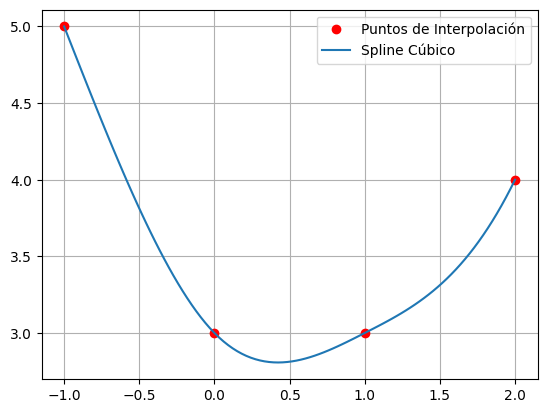

In [46]:
x_data = np.array([-1, 0, 1, 2])
y_data = np.array([5, 3, 3, 4])

n = len(x_data) - 1
A = np.zeros((4 * n, 4 * n))  # Matriz
b = np.zeros(4 * n)  # Vector

# Construcción del sistema de ecuaciones
row = 0
for i in range(n):
    xi, xi1 = x_data[i], x_data[i+1]

    # Ecuación de interpolación en xi
    A[row, 4*i:4*i+4] = [1, xi - xi, (xi - xi)**2, (xi - xi)**3]
    b[row] = y_data[i]
    row += 1

    # Ecuación de interpolación en xi+1
    A[row, 4*i:4*i+4] = [1, xi1 - xi, (xi1 - xi)**2, (xi1 - xi)**3]
    b[row] = y_data[i+1]
    row += 1

#continuidad de la primera derivada
for i in range(n-1):
    xi1 = x_data[i+1]
    A[row, 4*i:4*i+4] = [0, 1, 2*(xi1 - x_data[i]), 3*(xi1 - x_data[i])**2]
    A[row, 4*(i+1):4*(i+1)+4] = [0, -1, -2*(xi1 - x_data[i+1]), -3*(xi1 - x_data[i+1])**2]
    row += 1

#continuidad de la segunda derivada
for i in range(n-1):
    xi1 = x_data[i+1]
    A[row, 4*i:4*i+4] = [0, 0, 2, 6*(xi1 - x_data[i])]
    A[row, 4*(i+1):4*(i+1)+4] = [0, 0, -2, -6*(xi1 - x_data[i+1])]
    row += 1

#fronteras naturales (segunda derivada en los extremos es 0)
A[row, 2] = 2
row += 1
A[row, -2] = 2

# Resolver el sistema
coef = solve(A, b)

# Obtener coeficientes de los polinomios
splines = [coef[i*4:(i+1)*4] for i in range(n)]

x_eval = 1.5
for i in range(n):
    if x_data[i] <= x_eval <= x_data[i+1]:
        a, b, c, d = splines[i]
        x0 = x_data[i]
        y_eval = a + b*(x_eval - x0) + c*(x_eval - x0)**2 + d*(x_eval - x0)**3
        print(f"S({x_eval}) = {y_eval:.4f}")
        break

x_plot = np.linspace(-1, 2, 100)
y_plot = np.zeros_like(x_plot)
for i in range(n):
    a, b, c, d = splines[i]
    x0 = x_data[i]
    mask = (x_plot >= x_data[i]) & (x_plot <= x_data[i+1])
    y_plot[mask] = a + b*(x_plot[mask] - x0) + c*(x_plot[mask] - x0)**2 + d*(x_plot[mask] - x0)**3

plt.plot(x_data, y_data, 'ro', label='Puntos de Interpolación')
plt.plot(x_plot, y_plot, label='Spline Cúbico')
plt.legend()
plt.grid()
plt.show()


In [ ]:
pol_cubic = CubicSpline(x,y)

pol_cubic(x_eval)

array(3.4375)